In [2]:
%matplotlib inline
!pip install pykeops[colab] > install.log
!pip install si_prefix
import pykeops
from dataset_utils import get_dataset
import time
from ivf_torch import IVF
from pykeops.torch import LazyTensor
import numpy as np
import torch
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
!cd /content/drive/My\ Drive/KeOps
!ls /content/drive/My\ Drive/KeOps/*.py

import sys
sys.path.append('/content/drive/My Drive/KeOps')
!pwd

Mounted at /content/drive
'/content/drive/My Drive/KeOps/benchmark_utils.py'
'/content/drive/My Drive/KeOps/dataset_utils.py'
'/content/drive/My Drive/KeOps/ivf_torch.py'
'/content/drive/My Drive/KeOps/NNDescent.py'
/content


In [3]:
def accuracy(indices_test, indices_truth):
  '''
  Compares the test and ground truth indices (rows = KNN for each point in dataset)
  Returns accuracy: proportion of correct nearest neighbours
  '''
  N, k = indices_test.shape
  
  # Calculate number of correct nearest neighbours
  accuracy = 0
  for i in range(k):
    accuracy += torch.sum(indices_test == indices_truth).float()/N
    indices_truth = torch.roll(indices_truth, 1, -1) # Create a rolling window (index positions may not match)
  accuracy = float(accuracy/k) # percentage accuracy

  return accuracy

In [4]:
import csv

def write_and_print(fitting,query,a_s,clusters_s,accuracies,ac):

    with open('output.csv','w') as f:
        wr = csv.writer(f, delimiter=',')
        wr.writerow(['fitting_time','query_time','a','clusters','accuracies'])
        wr.writerow(fitting)
        wr.writerow(query)
        wr.writerow(a_s)
        wr.writerow(clusters_s)
        wr.writerow(accuracies)
        wr.writerow(ac)

    plt.figure(figsize=(12, 8))
    plt.scatter(query,accuracies)
    plt.title('accuracy vs query time')
    plt.show()
    plt.figure(figsize=(12, 8))
    plt.scatter(ac,accuracies)
    plt.title('accuracy vs a/clusters')
    plt.show()
    plt.figure(figsize=(12, 8))
    plt.scatter(ac,query)
    plt.title('query time vs a/clusters')
    plt.show()
    plt.figure(figsize=(12, 8))
    plt.scatter(a_s, fitting)
    plt.title('fitting time vs a')
    plt.show()
    plt.figure(figsize=(12, 8))
    plt.scatter(a_s,query)
    plt.title('query time vs a')
    plt.show()
    plt.figure(figsize=(12, 8))
    plt.scatter(clusters_s,fitting)
    plt.title('fitting time vs clusters')
    plt.show()
    plt.figure(figsize=(12, 8))
    plt.scatter(clusters_s,query)
    plt.title('query time vs clusters')
    plt.show()
    plt.figure(figsize=(12, 8))
    plt.scatter(clusters_s, accuracies,label='accuracy vs clusters')
    plt.scatter(a_s,accuracies,label='accuracy vs a')
    plt.legend()
    plt.xscale('log')
    plt.show()

## GloVe100

10 done
20 done
30 done
40 done
50 done
60 done
70 done
80 done
90 done


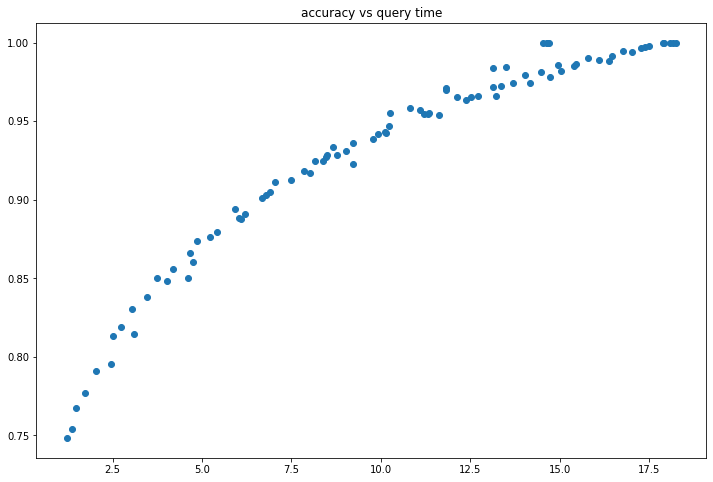

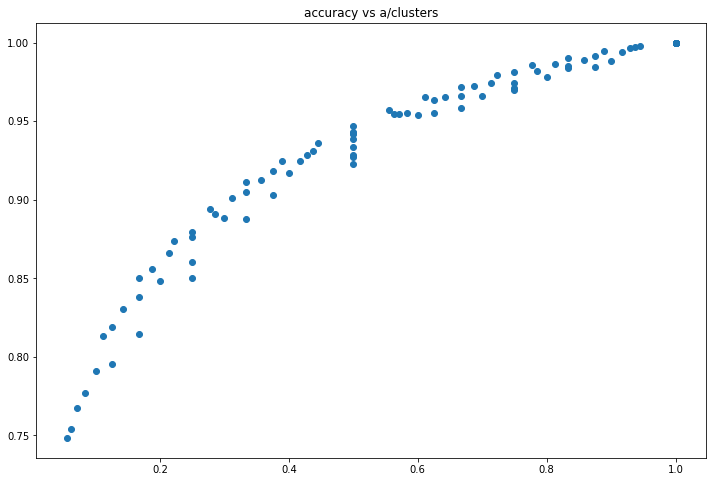

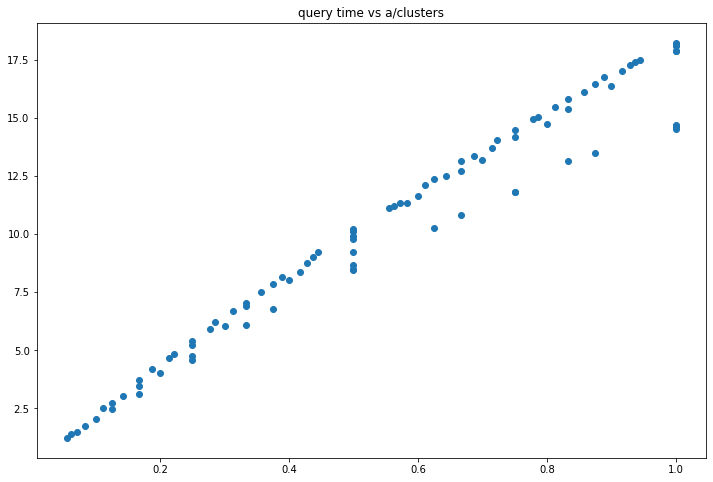

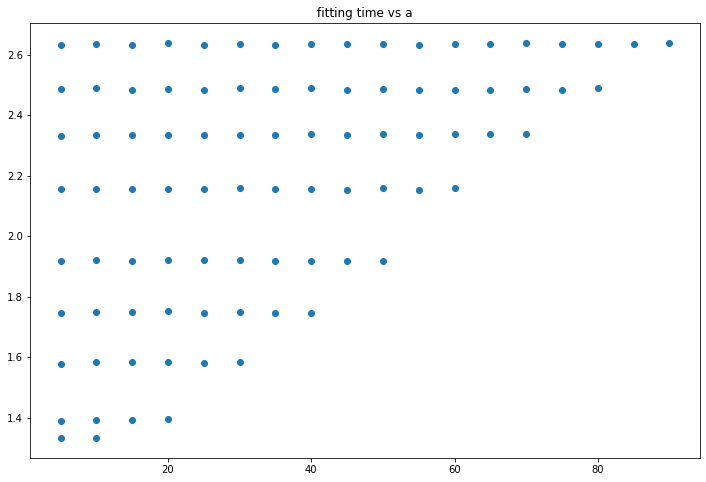

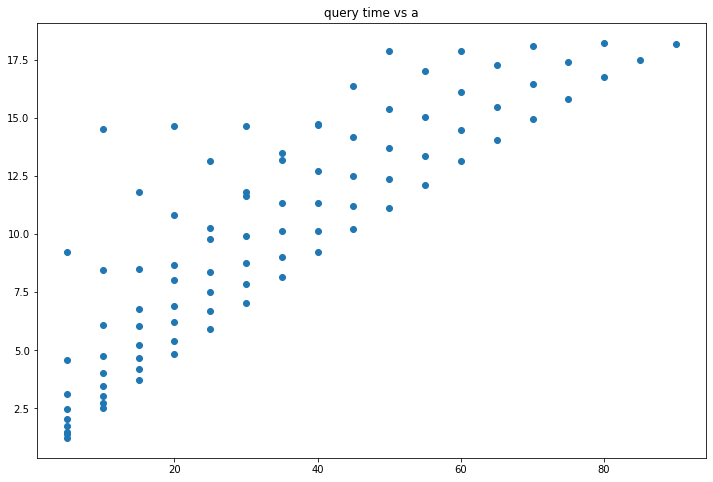

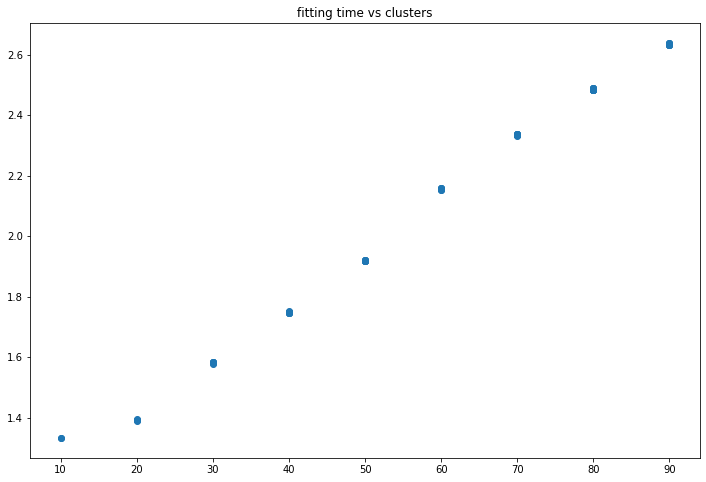

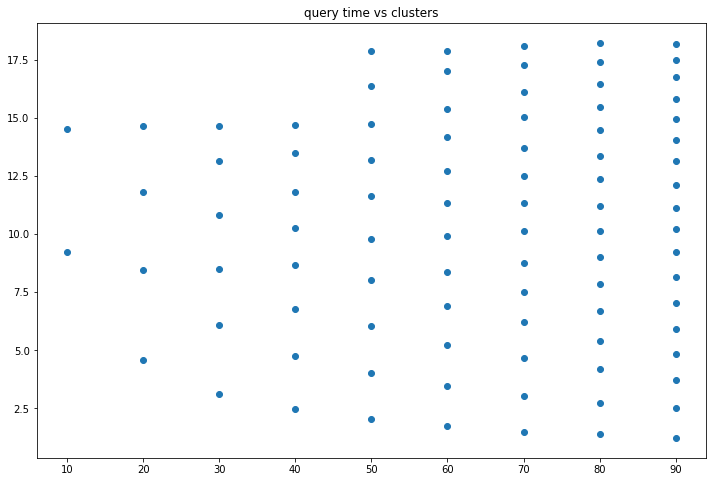

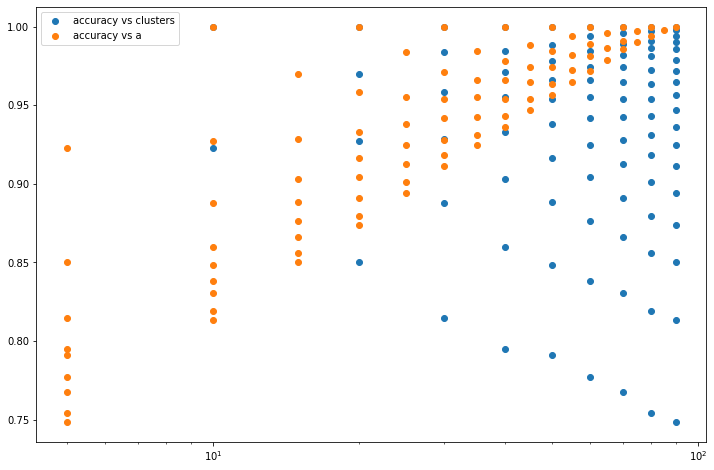

In [ ]:
np.random.seed(0)

fitting = []
query = []
a_s = []
clusters_s = []
accuracies = []
ac = []

k=5
x_train, x_test, metric, _ = get_dataset('GloVe100').values()

x=torch.from_numpy(x_train)
y=torch.from_numpy(x_test)

x/=torch.linalg.norm(x, dim=1, keepdim=True)
y/=torch.linalg.norm(y, dim=1, keepdim=True)

device=torch.device("cuda")
x=x.to(device)
y=y.to(device)

x_LT = LazyTensor(x.unsqueeze(0))
y_LT = LazyTensor(y.unsqueeze(1))
d = -(x_LT|y_LT)
truth = d.argKmin(k, dim=1)

for clusters in torch.arange(10,100,10):
    for a in torch.arange(5,100,5):
        if a > clusters:
            print(clusters,'done')
            break
        clusters = int(clusters)
        a = int(a)
        test = IVF(k=k,metric='angular_full',normalise=False)
        start = time.time()
        test.fit(x,clusters=clusters,a=a)
        fitting.append(time.time()-start)
        start = time.time()
        nn2=test.kneighbors(y)
        query.append(time.time()-start)
        a_s.append(a)
        clusters_s.append(clusters)
        accuracies.append(accuracy(truth,nn2))
        ac.append(a/clusters)

write_and_print(fitting,query,a_s,clusters_s,accuracies,ac)

## MNIST Euclidean

[pyKeOps] Compiling libKeOpstorch3c7f7660f9 in /root/.cache/pykeops-1.5-cpython-37:
       formula: ArgMin_Reduction(Sum(Square((Var(0,784,0) - Var(1,784,1)))),0)
       aliases: Var(0,784,0); Var(1,784,1); 
       dtype  : float32
... 
Done.
[pyKeOps] Compiling libKeOpstorch3026089387 in /root/.cache/pykeops-1.5-cpython-37:
       formula: ArgKMin_Reduction(Sum(Square((Var(0,784,0) - Var(1,784,1)))),5,0)
       aliases: Var(0,784,0); Var(1,784,1); 
       dtype  : float32
... 
Done.
[pyKeOps] Compiling libKeOpstorch1de21823a3 in /root/.cache/pykeops-1.5-cpython-37:
       formula: ArgKMin_Reduction(Sum(Square((Var(0,784,0) - Var(1,784,1)))),10,0)
       aliases: Var(0,784,0); Var(1,784,1); 
       dtype  : float32
... 
Done.
10 done
[pyKeOps] Compiling libKeOpstorch3a6988085b in /root/.cache/pykeops-1.5-cpython-37:
       formula: ArgKMin_Reduction(Sum(Square((Var(0,784,0) - Var(1,784,1)))),15,0)
       aliases: Var(0,784,0); Var(1,784,1); 
       dtype  : float32
... 
Done.
[pyKeOps]

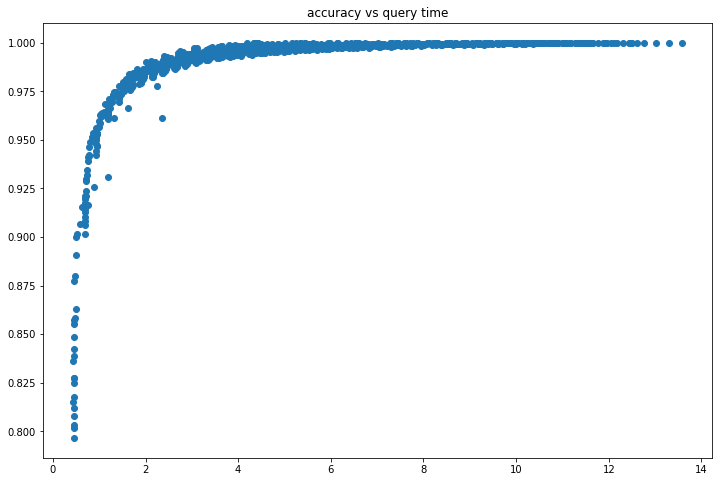

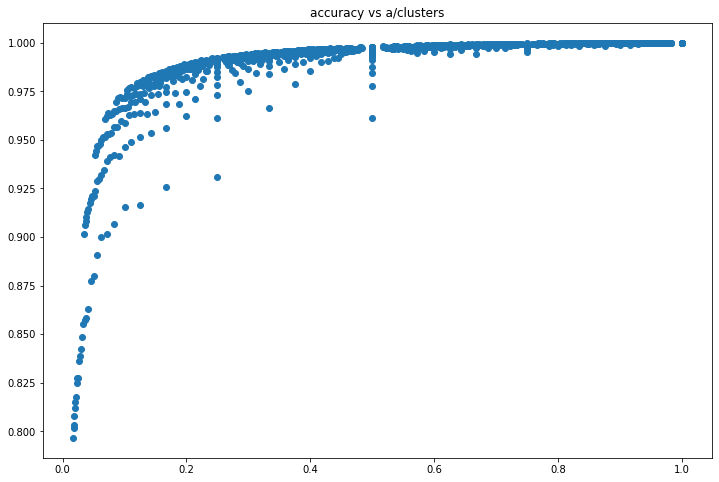

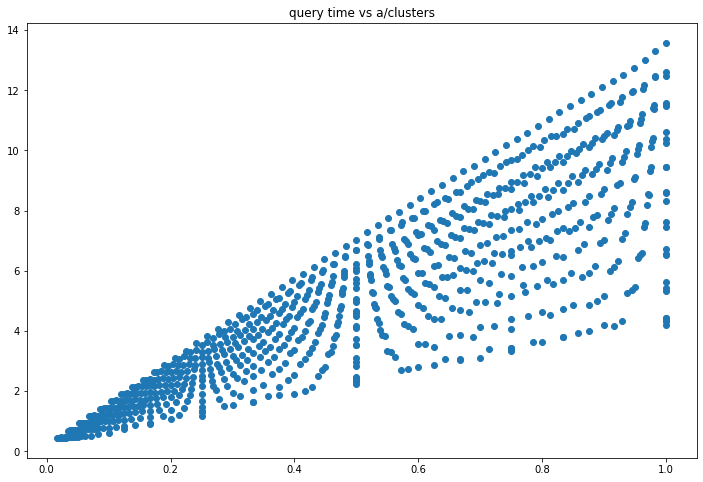

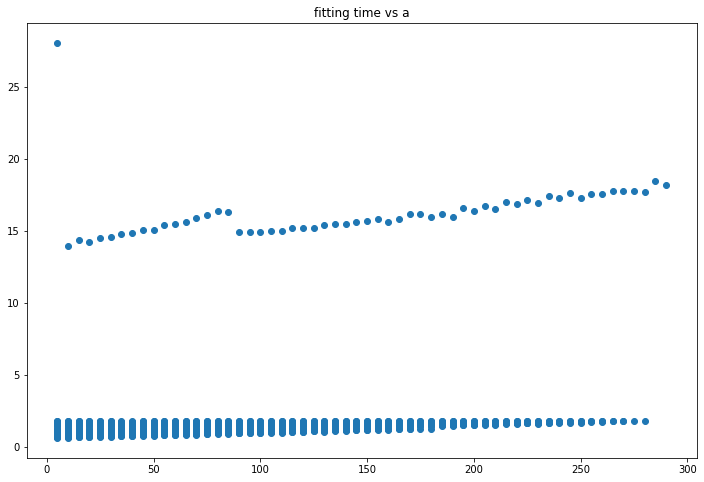

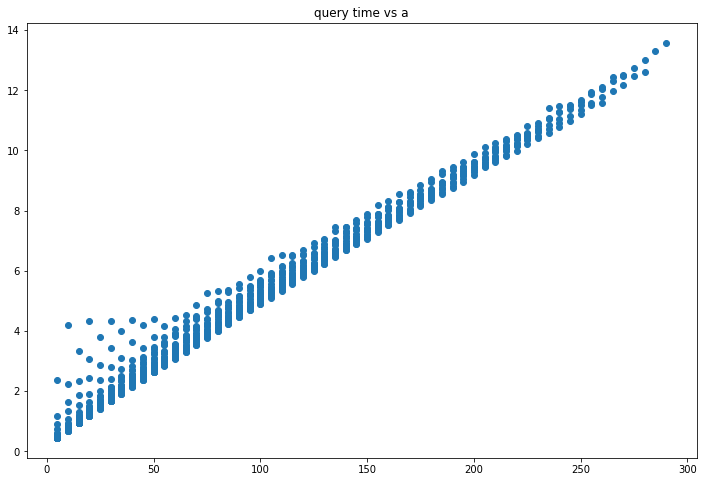

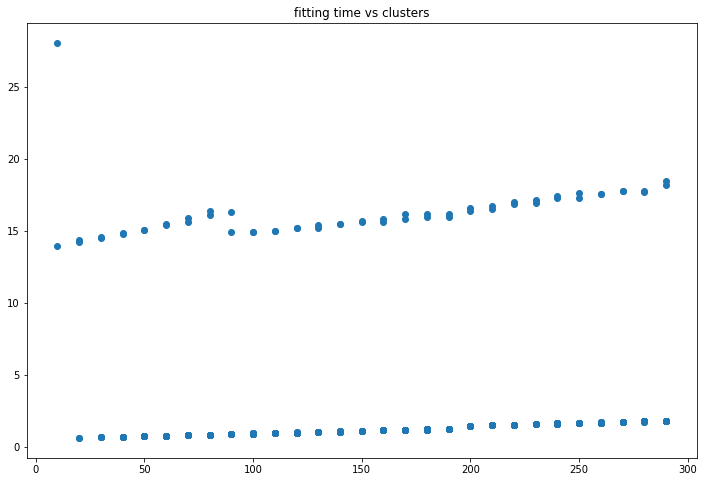

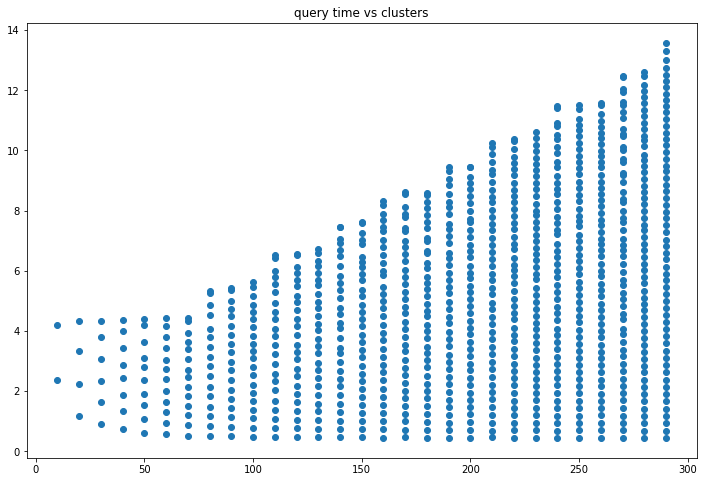

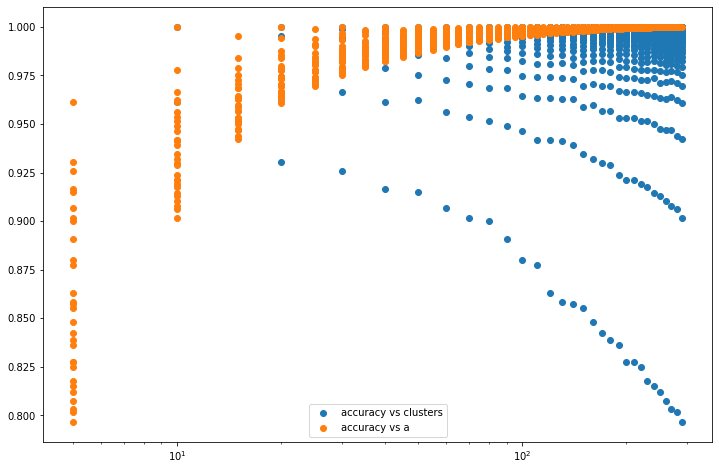

In [ ]:
np.random.seed(0)

fitting = []
query = []
a_s = []
clusters_s = []
accuracies = []
ac = []

k=5
x_train, x_test, metric, _ = get_dataset('MNIST a').values()

x=torch.from_numpy(x_train)
y=torch.from_numpy(x_test)

device=torch.device("cuda")
x=x.to(device)
y=y.to(device)

x_LT = LazyTensor(x.unsqueeze(0))
y_LT = LazyTensor(y.unsqueeze(1))
d = ((x_LT-y_LT)**2).sum(-1)
truth = d.argKmin(k, dim=1)

for clusters in torch.arange(10,300,10):
    for a in torch.arange(5,300,5):
        if a > clusters:
            print(clusters,'done')
            break
        clusters = int(clusters)
        a = int(a)
        test = IVF(k=k,metric='euclidean',normalise=False)
        start = time.time()
        test.fit(x,clusters=clusters,a=a)
        fitting.append(time.time()-start)
        start = time.time()
        nn2=test.kneighbors(y)
        query.append(time.time()-start)
        a_s.append(a)
        clusters_s.append(clusters)
        accuracies.append(accuracy(truth,nn2))
        ac.append(a/clusters)

write_and_print(fitting,query,a_s,clusters_s,accuracies,ac)

## Uniform Angular d=100

[pyKeOps] Compiling libKeOpstorch6d6753bdda in /root/.cache/pykeops-1.5-cpython-37:
       formula: ArgMin_Reduction((Minus((Var(0,100,0) | Var(1,100,1))) / Sqrt((Minus((Var(0,100,0) | Var(0,100,0))) * Minus((Var(1,100,1) | Var(1,100,1)))))),0)
       aliases: Var(0,100,0); Var(1,100,1); 
       dtype  : float32
... 
Done.
[pyKeOps] Compiling libKeOpstorch0062f0a633 in /root/.cache/pykeops-1.5-cpython-37:
       formula: ArgKMin_Reduction((Minus((Var(0,100,0) | Var(1,100,1))) / Sqrt((Minus((Var(0,100,0) | Var(0,100,0))) * Minus((Var(1,100,1) | Var(1,100,1)))))),5,0)
       aliases: Var(0,100,0); Var(1,100,1); 
       dtype  : float32
... 
Done.
[pyKeOps] Compiling libKeOpstorch514144bc4b in /root/.cache/pykeops-1.5-cpython-37:
       formula: ArgKMin_Reduction((Minus((Var(0,100,0) | Var(1,100,1))) / Sqrt((Minus((Var(0,100,0) | Var(0,100,0))) * Minus((Var(1,100,1) | Var(1,100,1)))))),10,0)
       aliases: Var(0,100,0); Var(1,100,1); 
       dtype  : float32
... 
Done.
10 done
[pyKeOps] 

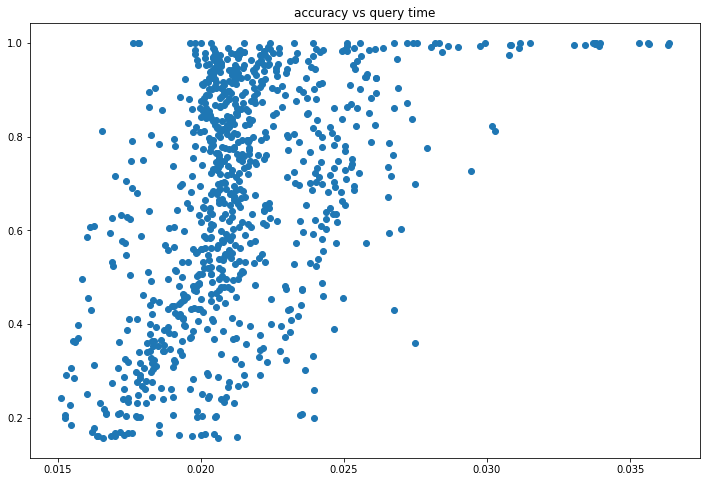

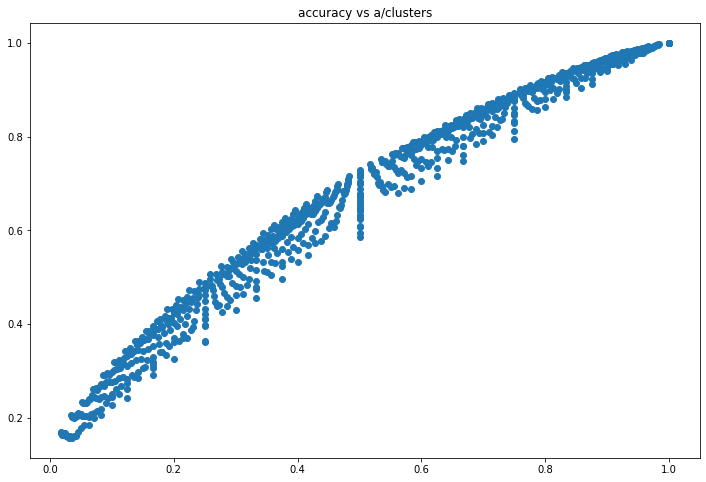

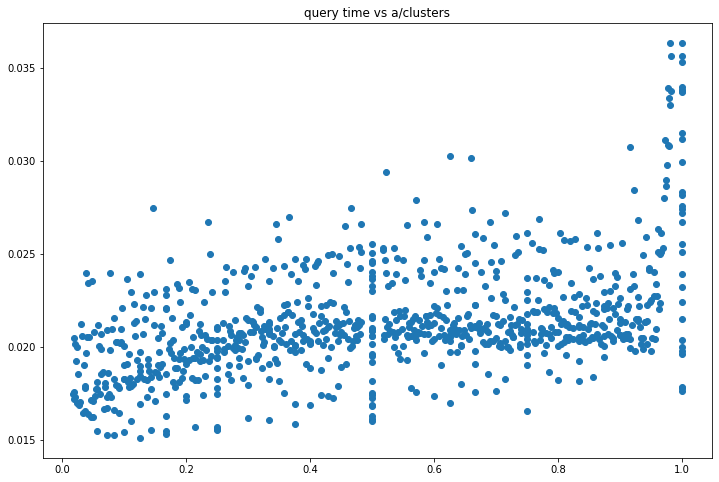

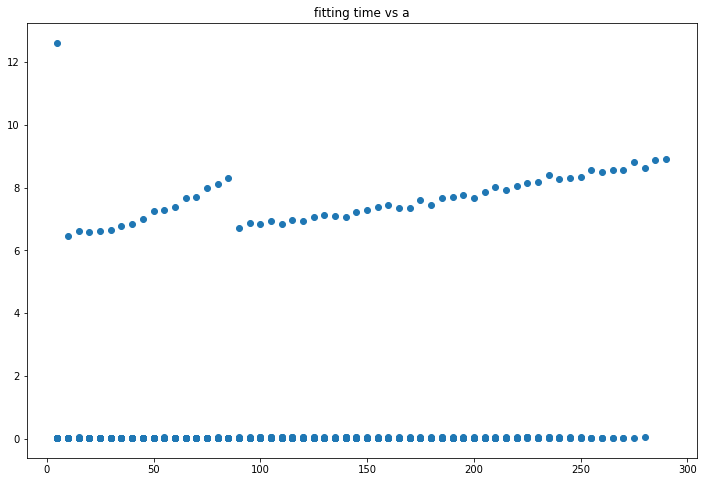

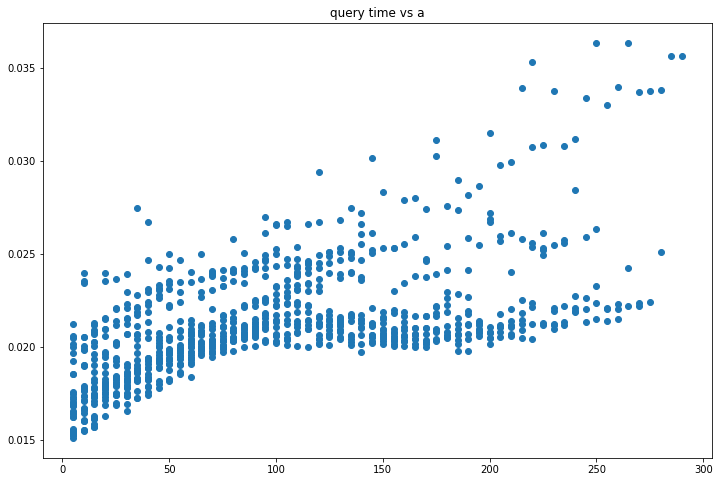

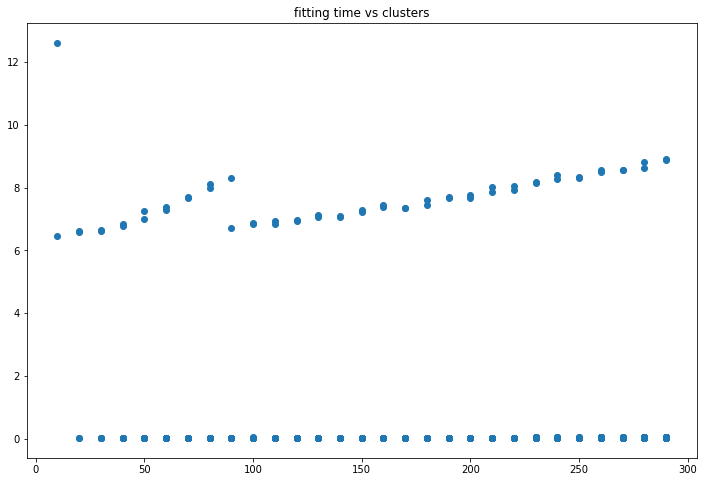

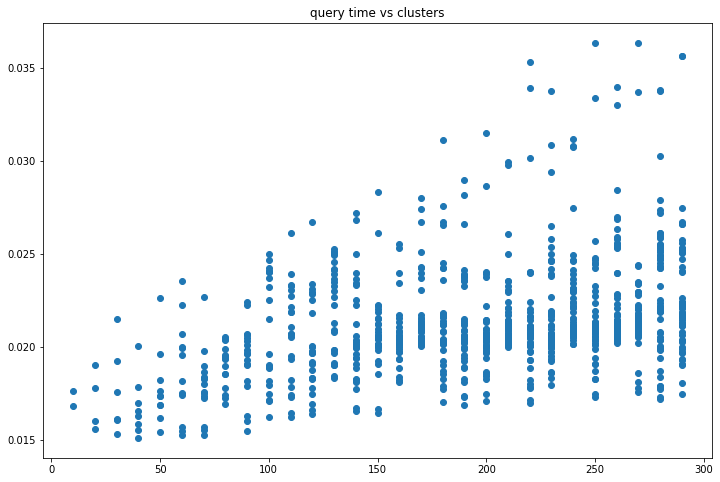

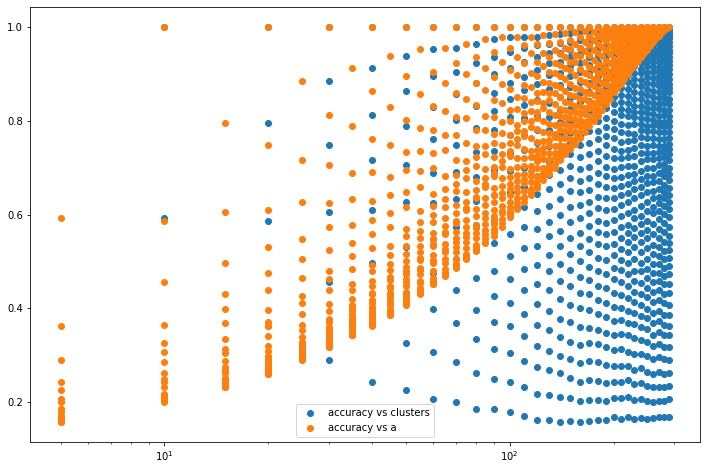

In [8]:
np.random.seed(0)

fitting = []
query = []
a_s = []
clusters_s = []
accuracies = []
ac = []

k=5
x_train, x_test, metric, _ = get_dataset(metric='angular',ntrain=10**3,ntest=10**3,d=100).values()

x=torch.from_numpy(x_train)
y=torch.from_numpy(x_test)

device=torch.device("cuda")
x=x.to(device)
y=y.to(device)

x/=torch.linalg.norm(x, dim=1, keepdim=True)
y/=torch.linalg.norm(y, dim=1, keepdim=True)

distance = -y@(x.T)/(((x@(x.T)).diag().unsqueeze(0)*(y@(y.T)).diag().unsqueeze(1)).sqrt())
truth = torch.argsort(distance,dim=1)
truth = truth[:, :k]

for clusters in torch.arange(10,300,10):
    for a in torch.arange(5,300,5):
        if a > clusters:
            print(clusters,'done')
            break
        clusters = int(clusters)
        a = int(a)
        test = IVF(k=k,metric='angular_full',normalise=False)
        start = time.time()
        test.fit(x,clusters=clusters,a=a)
        fitting.append(time.time()-start)
        start = time.time()
        nn2=test.kneighbors(y)
        query.append(time.time()-start)
        a_s.append(a)
        clusters_s.append(clusters)
        accuracies.append(accuracy(truth,nn2))
        ac.append(a/clusters)

write_and_print(fitting,query,a_s,clusters_s,accuracies,ac)

## Uniform Euclidean d=100

KeOps bruteforce: 0.03473496437072754
10 done
20 done
30 done
40 done
50 done
60 done
70 done
80 done
90 done
100 done
110 done
120 done


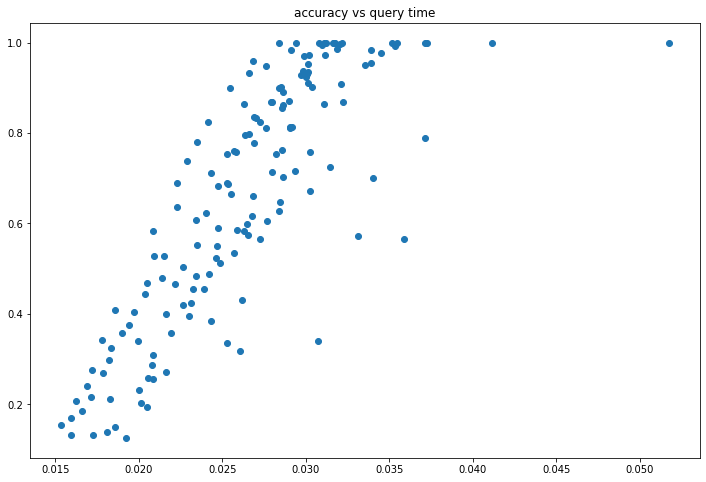

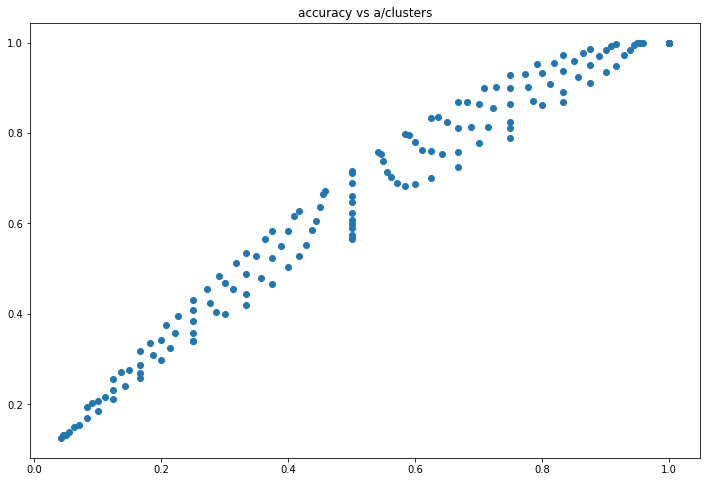

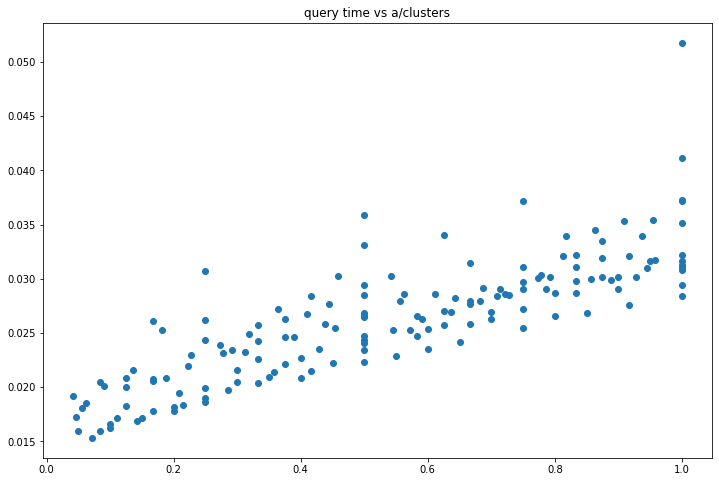

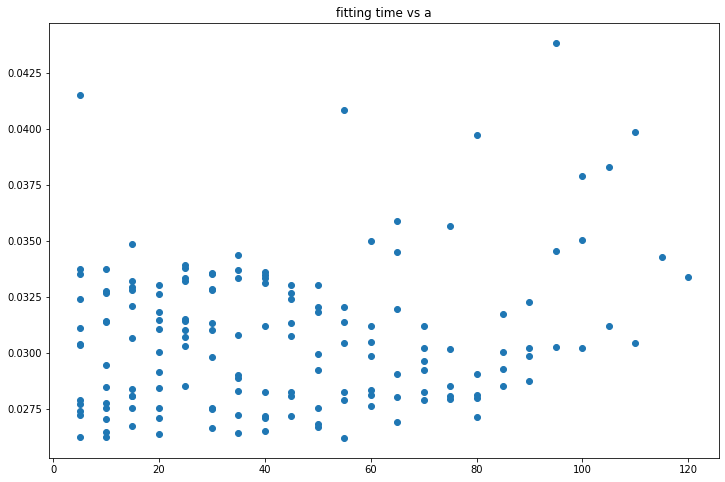

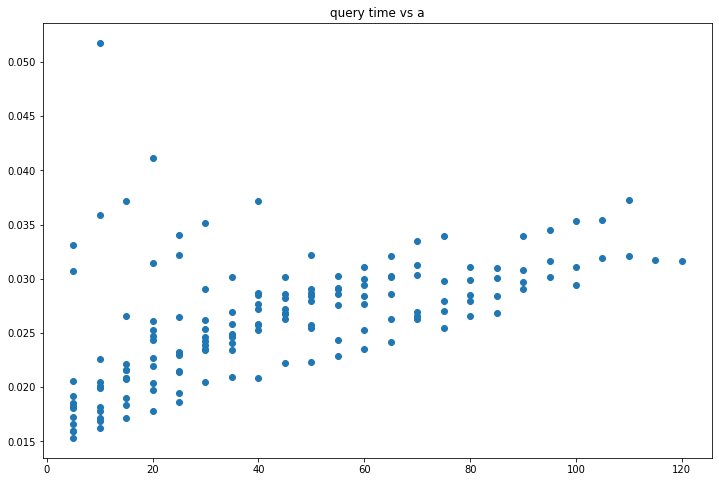

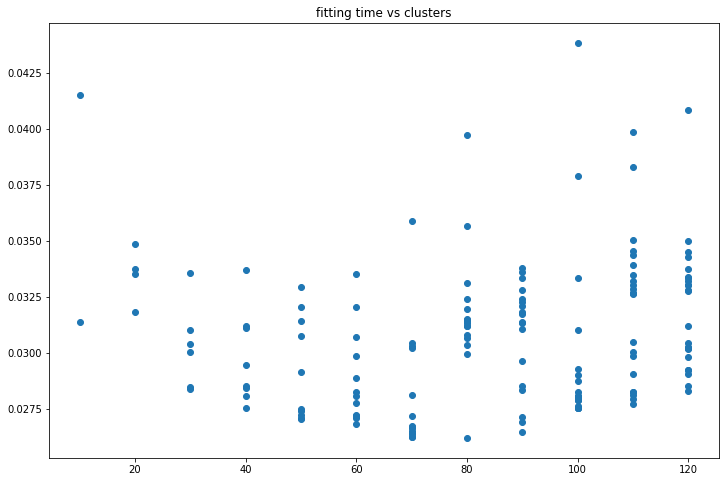

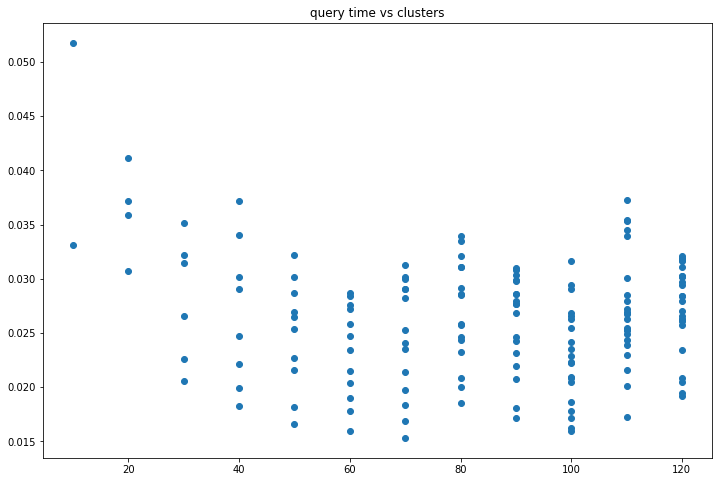

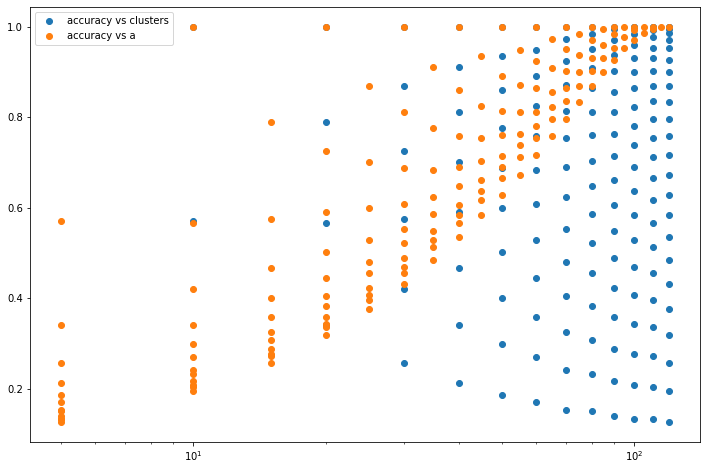

In [12]:
np.random.seed(0)

fitting = []
query = []
a_s = []
clusters_s = []
accuracies = []
ac = []

k=5
x_train, x_test, metric, _ = get_dataset(metric='euclidean',ntrain=10**4,ntest=10**4,d=100).values()

x=torch.from_numpy(x_train)
y=torch.from_numpy(x_test)

device=torch.device("cuda")
x=x.to(device)
y=y.to(device)

x_LT = LazyTensor(x.unsqueeze(0))
y_LT = LazyTensor(y.unsqueeze(1))
start = time.time()
d = ((x_LT-y_LT)**2).sum(-1)
truth = d.argKmin(k, dim=1)
print('KeOps bruteforce:',time.time()-start)

for clusters in torch.arange(10,130,10):
    for a in torch.arange(5,130,5):
        if a > clusters:
            print(clusters,'done')
            break
        clusters = int(clusters)
        a = int(a)
        test = IVF(k=k,metric='euclidean',normalise=False)
        start = time.time()
        test.fit(x,clusters=clusters,a=a)
        fitting.append(time.time()-start)
        start = time.time()
        nn2=test.kneighbors(y)
        query.append(time.time()-start)
        a_s.append(a)
        clusters_s.append(clusters)
        accuracies.append(accuracy(truth,nn2))
        ac.append(a/clusters)

write_and_print(fitting,query,a_s,clusters_s,accuracies,ac)

## Uniform Manhattan d=100

KeOps bruteforce: 0.038344383239746094
10 done
20 done
30 done
40 done
50 done
60 done
70 done
80 done
90 done
100 done
110 done
120 done


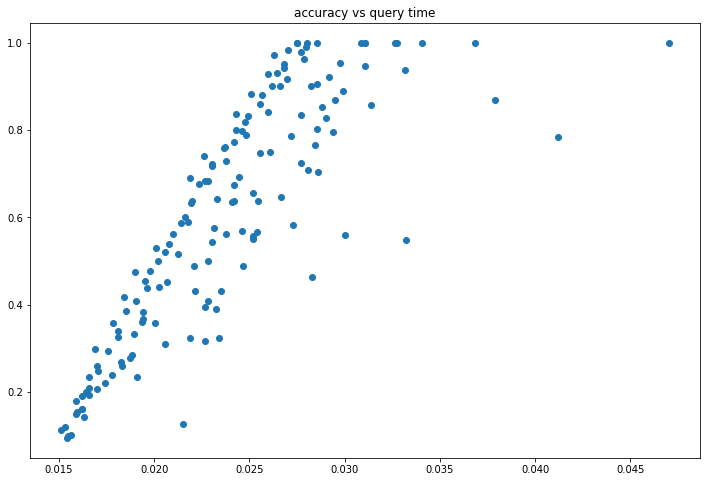

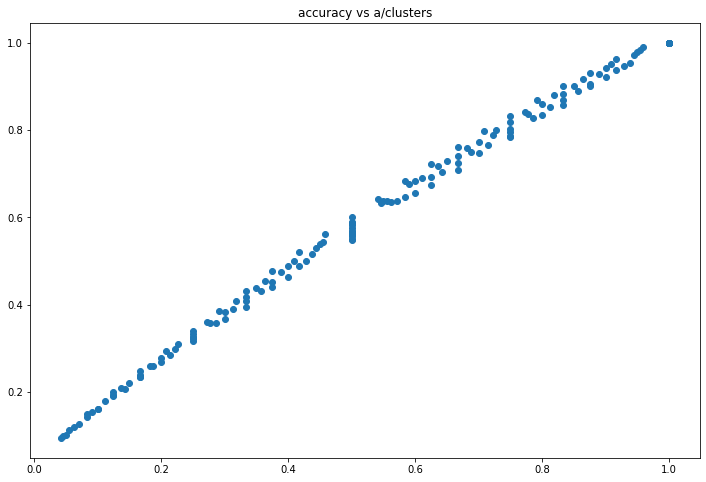

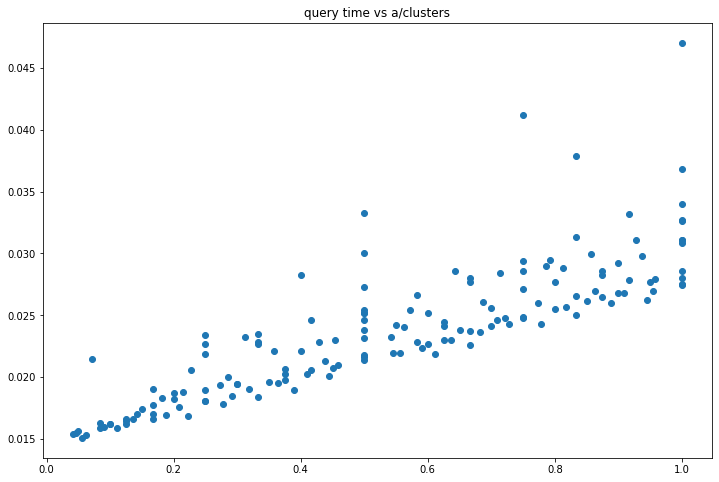

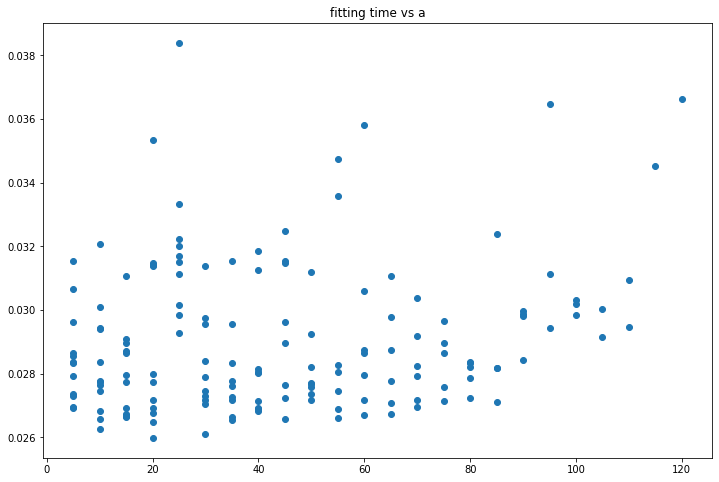

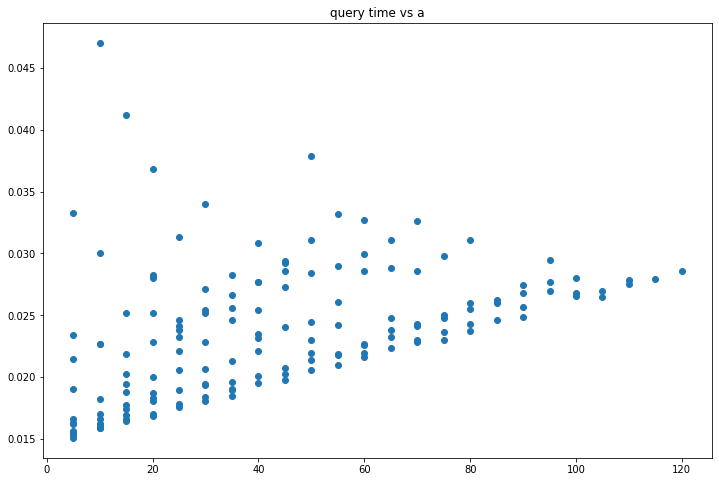

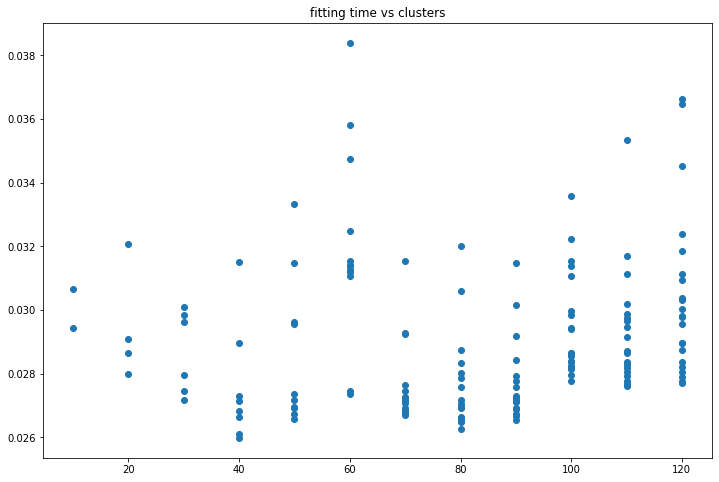

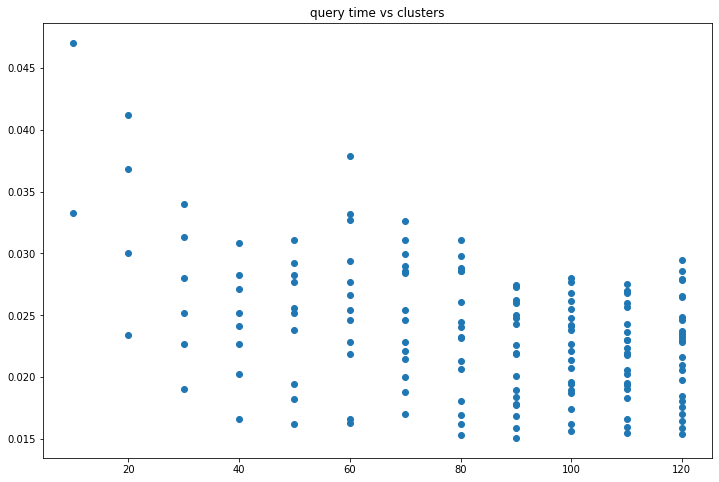

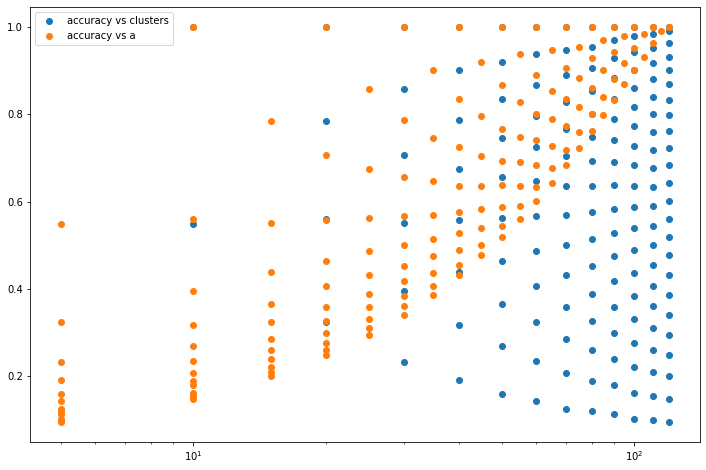

In [13]:
np.random.seed(0)

fitting = []
query = []
a_s = []
clusters_s = []
accuracies = []
ac = []

k=5
x_train, x_test, metric, _ = get_dataset(metric='manhattan',ntrain=10**4,ntest=10**4,d=100).values()

x=torch.from_numpy(x_train)
y=torch.from_numpy(x_test)

device=torch.device("cuda")
x=x.to(device)
y=y.to(device)

x_LT = LazyTensor(x.unsqueeze(0))
y_LT = LazyTensor(y.unsqueeze(1))
start = time.time()
d = ((x_LT-y_LT).abs()).sum(-1)
truth = d.argKmin(k, dim=1)
print('KeOps bruteforce:',time.time()-start)

for clusters in torch.arange(10,130,10):
    for a in torch.arange(5,130,5):
        if a > clusters:
            print(clusters,'done')
            break
        clusters = int(clusters)
        a = int(a)
        test = IVF(k=k,metric='manhattan',normalise=False)
        start = time.time()
        test.fit(x,clusters=clusters,a=a)
        fitting.append(time.time()-start)
        start = time.time()
        nn2=test.kneighbors(y)
        query.append(time.time()-start)
        a_s.append(a)
        clusters_s.append(clusters)
        accuracies.append(accuracy(truth,nn2))
        ac.append(a/clusters)

write_and_print(fitting,query,a_s,clusters_s,accuracies,ac)

## Uniform Hyperbolic d=100

KeOps bruteforce: 0.006749868392944336
10 done
20 done


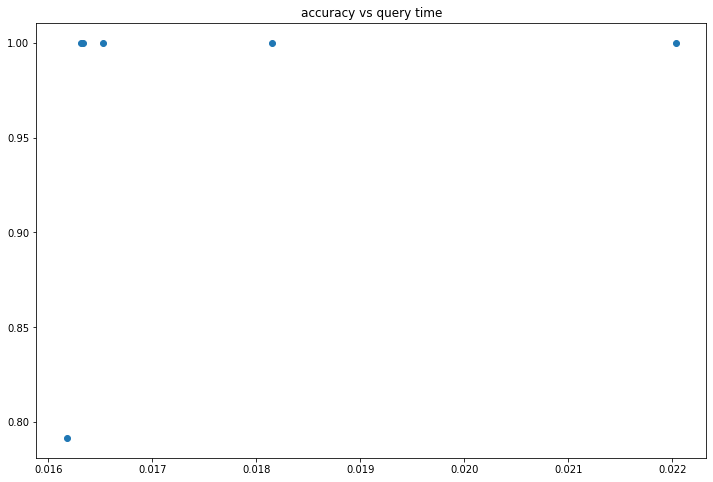

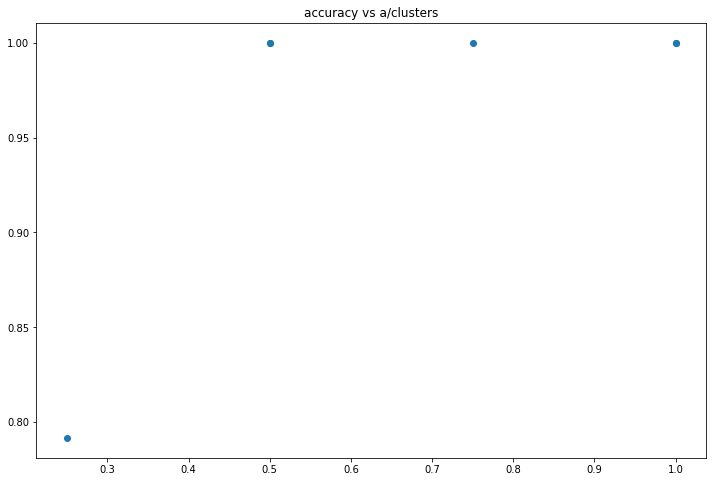

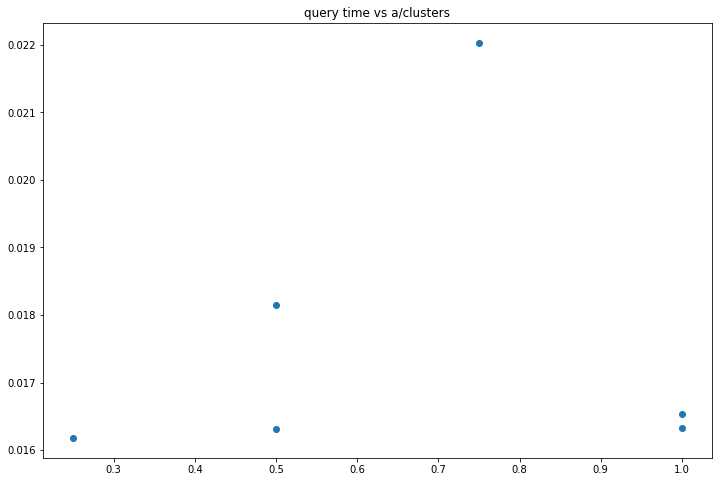

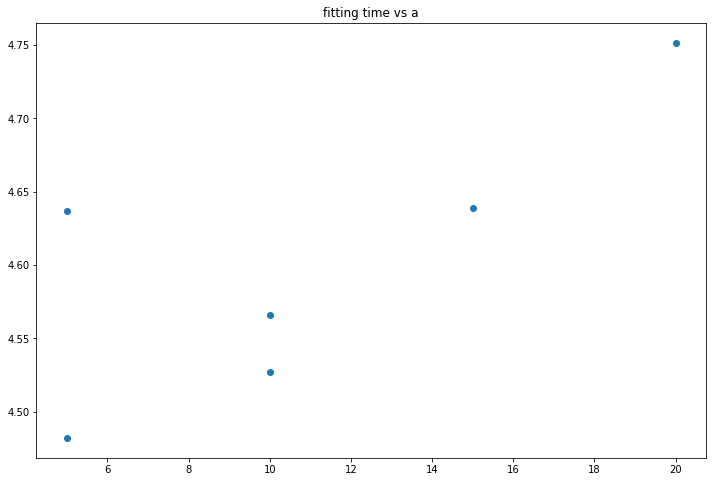

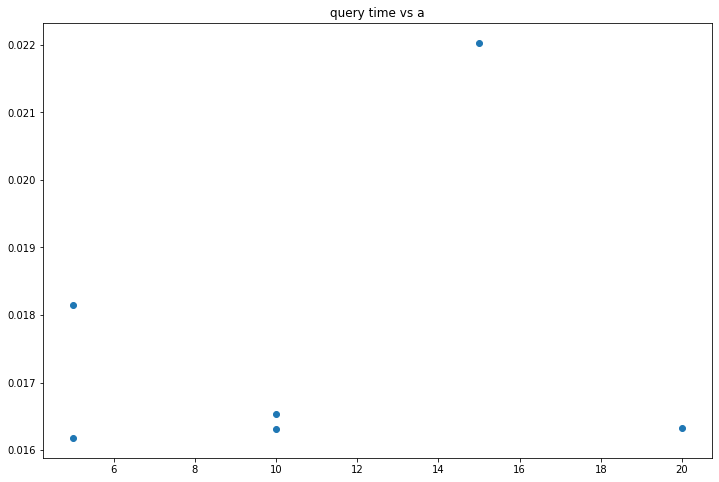

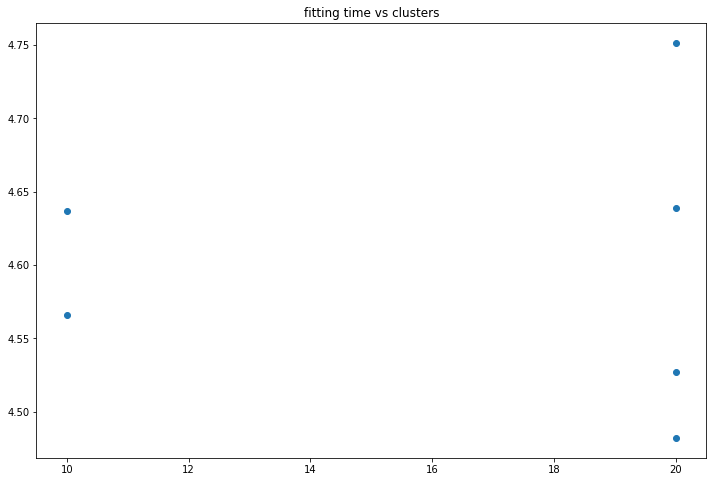

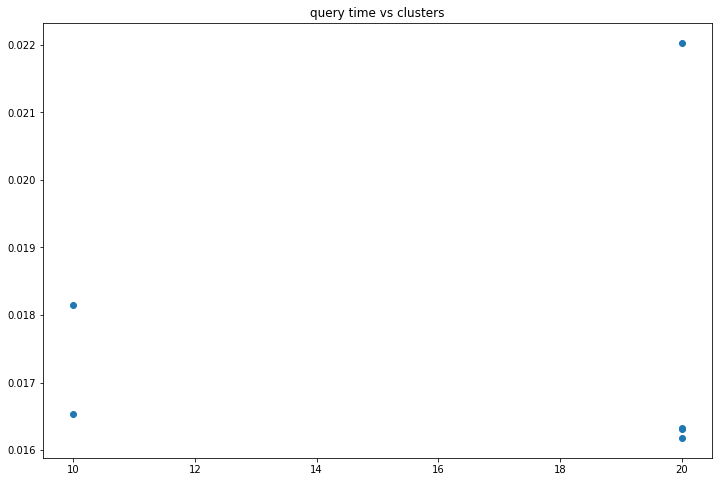

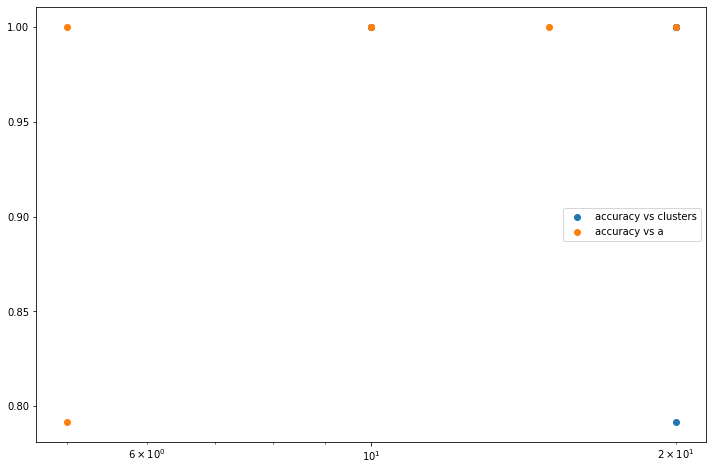

In [5]:
np.random.seed(0)

fitting = []
query = []
a_s = []
clusters_s = []
accuracies = []
ac = []

k=5
x_train, x_test, metric, _ = get_dataset(metric='hyperbolic',ntrain=10**3,ntest=10**3,d=100).values()

x=torch.from_numpy(x_train)
y=torch.from_numpy(x_test)

device=torch.device("cuda")
x=x.to(device)
y=y.to(device)

x_LT = LazyTensor(x.unsqueeze(0))
y_LT = LazyTensor(y.unsqueeze(1))
start = time.time()
d =  ((y_LT - x_LT) ** 2).sum(-1) / (y_LT[0] * x_LT[0])
truth = d.argKmin(k, dim=1)
print('KeOps bruteforce:',time.time()-start)

for clusters in torch.arange(10,30,10):
    for a in torch.arange(5,30,5):
        if a > clusters:
            print(clusters,'done')
            break
        clusters = int(clusters)
        a = int(a)
        test = IVF(k=k,metric='hyperbolic',normalise=False)
        start = time.time()
        test.fit(x,clusters=clusters,a=a, approx=True)
        fitting.append(time.time()-start)
        start = time.time()
        nn2=test.kneighbors(y)
        query.append(time.time()-start)
        a_s.append(a)
        clusters_s.append(clusters)
        accuracies.append(accuracy(truth,nn2))
        ac.append(a/clusters)

write_and_print(fitting,query,a_s,clusters_s,accuracies,ac)